In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [66]:
X,y = make_regression(n_samples=100,n_features=1,n_targets=1,n_informative=1,noise=20,random_state=13)

In [67]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=4)

In [68]:
X_train.shape

(90, 1)

In [69]:
X_test.shape

(10, 1)

In [70]:
y_train.shape

(90,)

# Linear Regression

In [76]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [77]:
ypred = lr.predict(X_test)

In [78]:
print(r2_score(y_test,ypred))
print(lr.coef_)
print(lr.intercept_)

0.6654637039455882
[27.18712543]
-1.7833274140254127


# Lasso 

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.133e+04, tolerance: 7.802e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

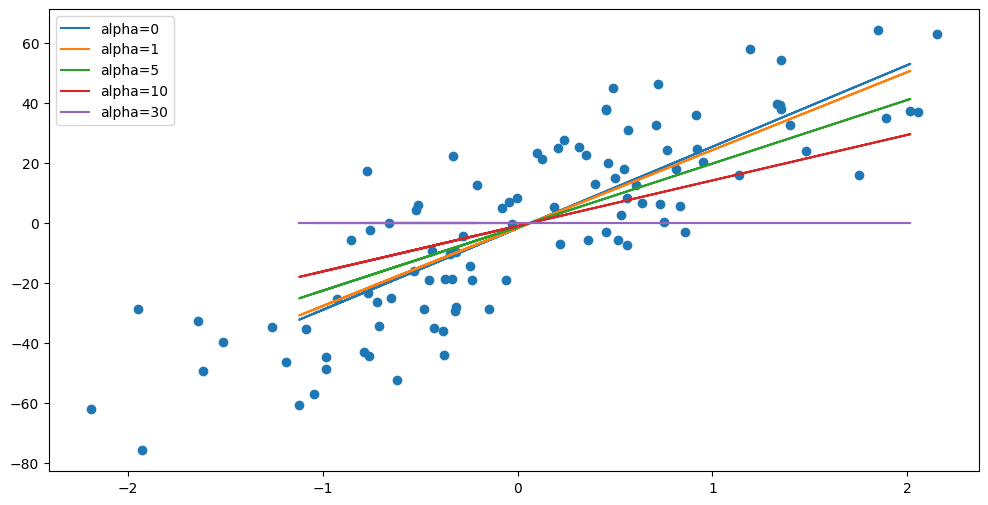

In [79]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()